## **Problem Statement**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are in the survey report labeled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’. 

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale and to build the most accurate model to predict passenger experience. 

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import warnings
warnings.filterwarnings('ignore')

## **EDA and Data Preprocessing**

In [ ]:
travel=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vThf6D9qstoIYtw2kkUjVKHfZkWx3yPlJAGUbJV9PYnwR1DozyNp4sJGe_DsDre2BgRywm3GGJQY-8S/pub?output=csv')

In [ ]:
travel.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [ ]:
survey=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS5tC5yGVNw-o_w75y-aAQzovNB0O-1Pub1LWxbalD1gABhBnzir69jrHDetsnTdohL7BF_q03CXlPb/pub?output=csv')

In [ ]:
survey.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

**We see that data contains NaN values, so we will need to do cleaning.**
**But let's first explore the data further.**

In [ ]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


**We see that:**
1. The dataset consists of 94,379 entries, has 9 columns, most of the values are non-null, but some are not.  ID, Travel_Class and Travel_Distance have no null values. 
2. Data types of the columns are int, float and object.  

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

**We see that:**

1. There are also 94,379 entries as in travel_train dataset. Most of the values are non-null. ID, Overall experience and Seat_Class columns have no null values. 
2. Most of the columns are of object type, except for ID and Overall_Experience which are int.
3. We can use ID column to merge travel and survey train sets into one dataset to proceed with exploration and modeling. 

**Let's merge both sets into one dataset**

In [ ]:
dataset=survey.copy().merge(travel,how='inner',on='ID')

In [ ]:
dataset

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0      98800001                   0  Needs Improvement  Green Car   
1      98800002                   0               Poor   Ordinary   
2      98800003                   1  Needs Improvement  Green Car   
3      98800004                   0         Acceptable   Ordinary   
4      98800005                   1         Acceptable   Ordinary   
...         ...                 ...                ...        ...   
94374  98894375                   0               Poor   Ordinary   
94375  98894376                   1               Good   Ordinary   
94376  98894377                   1  Needs Improvement  Green Car   
94377  98894378                   0  Needs Improvement   Ordinary   
94378  98894379                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
0                   Excellent          Excellent    Very Convenient   
1                   Excellent               Poor  Needs Improvement   
2           Needs Improvement  Needs Improvement  Needs Improvement   
3           Needs Improvement                NaN  Needs Improvement   
4                  Acceptable         Acceptable         Manageable   
...                       ...                ...                ...   
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                     NaN  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  ...  \
0                     Good     Needs Improvement     Acceptable  ...   
1                     Good                  Poor           Good  ...   
2        Needs Improvement                  Good      Excellent  ...   
3               Acceptable     Needs Improvement     Acceptable  ...   
4        Needs Improvement                  Good      Excellent  ...   
...                    ...                   ...            ...  ...   
94374                 Poor                  Poor           Poor  ...   
94375    Needs Improvement             Excellent      Excellent  ...   
94376                 Good             Excellent           Good  ...   
94377                 Good     Needs Improvement           Good  ...   
94378           Acceptable            Acceptable     Acceptable  ...   

             Cleanliness Online_Boarding  Gender   Customer_Type   Age  \
0      Needs Improvement            Poor  Female  Loyal Customer  52.0   
1                   Good            Good    Male  Loyal Customer  48.0   
2              Excellent       Excellent  Female  Loyal Customer  43.0   
3             Acceptable      Acceptable  Female  Loyal Customer  44.0   
4                   Good            Good  Female  Loyal Customer  50.0   
...                  ...             ...     ...             ...   ...   
94374               Good            Poor    Male  Loyal Customer  32.0   
94375         Acceptable            Good    Male  Loyal Customer  44.0   
94376               Good      Acceptable    Male             NaN  63.0   
94377          Excellent            Good    Male  Loyal Customer  16.0   
94378               Good      Acceptable    Male  Loyal Customer  54.0   

           Type_Travel Travel_Class Travel_Distance Departure_Delay_in_Mins  \
0                  NaN     Business             272                     0.0   
1      Personal Travel          Eco            2200                     9.0   
2      Business Travel     Business            1061                    77.0   
3      Business Travel     Business             780                    13.0   
4      Business Travel     Business            1981                     0.0   
...                ...          ...             ...                     ...   
94374  Business Travel  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [ ]:
travel.shape

(94379, 9)

In [ ]:
survey.shape

(94379, 17)

**We see that all columns were merged and no data was lost.**

In [ ]:
# Let's set ID as index
dataset.set_index('ID',inplace=True)

In [ ]:
dataset.head()

Overall_Experience       Seat_Comfort Seat_Class  \
ID                                                           
98800001                   0  Needs Improvement  Green Car   
98800002                   0               Poor   Ordinary   
98800003                   1  Needs Improvement  Green Car   
98800004                   0         Acceptable   Ordinary   
98800005                   1         Acceptable   Ordinary   

         Arrival_Time_Convenient           Catering  Platform_Location  \
ID                                                                       
98800001               Excellent          Excellent    Very Convenient   
98800002               Excellent               Poor  Needs Improvement   
98800003       Needs Improvement  Needs Improvement  Needs Improvement   
98800004       Needs Improvement                NaN  Needs Improvement   
98800005              Acceptable         Acceptable         Manageable   

         Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
ID                                                                   
98800001                 Good     Needs Improvement     Acceptable   
98800002                 Good                  Poor           Good   
98800003    Needs Improvement                  Good      Excellent   
98800004           Acceptable     Needs Improvement     Acceptable   
98800005    Needs Improvement                  Good      Excellent   

         Ease_of_Online_Booking  ...        Cleanliness Online_Boarding  \
ID                               ...                                      
98800001      Needs Improvement  ...  Needs Improvement            Poor   
98800002                   Good  ...               Good            Good   
98800003              Excellent  ...          Excellent       Excellent   
98800004             Acceptable  ...         Acceptable      Acceptable   
98800005                   Good  ...               Good            Good   

          Gender   Customer_Type   Age      Type_Travel Travel_Class  \
ID                                                                     
98800001  Female  Loyal Customer  52.0              NaN     Business   
98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
98800003  Female  Loyal Customer  43.0  Business Travel     Business   
98800004  Female  Loyal Customer  44.0  Business Travel     Business   
98800005  Female  Loyal Customer  50.0  Business Travel     Business   

         Travel_Distance  Departure_Delay_in_Mins Arrival_Delay_in_Mins  
ID                                                                       
98800001             272                      0.0                   5.0  
98800002            2200                      9.0                   0.0  
98800003            1061                     77.0                 119.0  
98800004             780                     13.0                  18.0  
98800005            1981                      0.0                   0.0  

[5 rows x 24 columns]

**Let's continue with exploratory data analysis**

In [ ]:
dataset.describe().T

count         mean          std   min     25%  \
Overall_Experience       94379.0     0.546658     0.497821   0.0     0.0   
Age                      94346.0    39.419647    15.116632   7.0    27.0   
Travel_Distance          94379.0  1978.888185  1027.961019  50.0  1359.0   
Departure_Delay_in_Mins  94322.0    14.647092    38.138781   0.0     0.0   
Arrival_Delay_in_Mins    94022.0    15.005222    38.439409   0.0     0.0   

                            50%     75%     max  
Overall_Experience          1.0     1.0     1.0  
Age                        40.0    51.0    85.0  
Travel_Distance          1923.0  2538.0  6951.0  
Departure_Delay_in_Mins     0.0    12.0  1592.0  
Arrival_Delay_in_Mins       0.0    13.0  1584.0

**We see that:**

* Numeric columns have very few missing values.
* There are probably outliers in Travel_Distance, Departure and Arrival Delays as max values are very high compared to interquartile range. 

**Let's check columns which have null_values.**

In [ ]:
print('Train Set Null Values')
print(dataset.isna().sum())

Train Set Null Values
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64


In [ ]:
# Let's create num and categorical column lists
num_cols=['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']
cat_cols=[col for col in dataset.columns if col not in num_cols]
print('Numerical Columns:', '\n')
num_cols

Numerical Columns: 



['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [ ]:
print('Categorical Columns:','\n')
cat_cols

Categorical Columns: 



['Overall_Experience',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class']

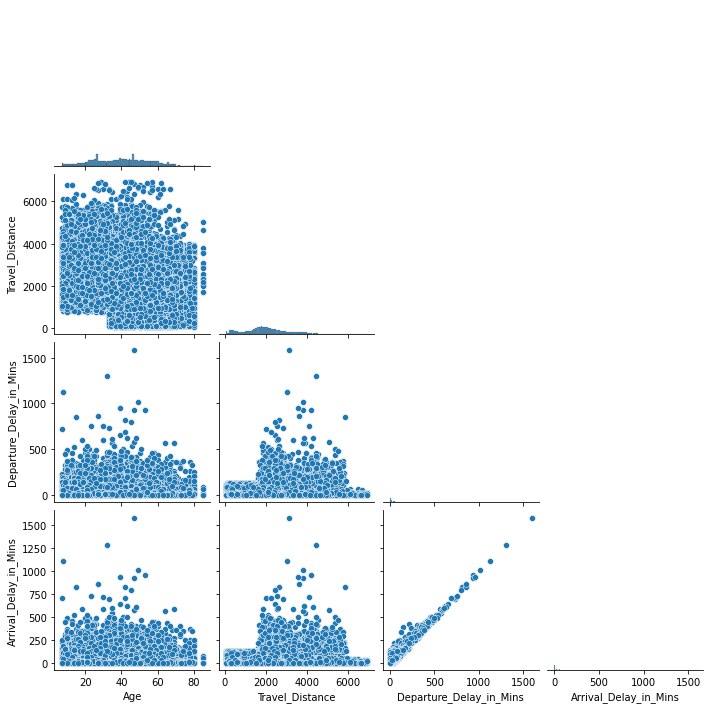

In [ ]:
sns.pairplot(dataset[num_cols], corner=True)

In [ ]:
# We see that there is high correlation between Arrival_Delay_in_Mins and Departure_Delay_in_Mins
# So we can impute it to each other where one is missing and another is not
dataset['Arrival_Delay_in_Mins'].fillna(dataset['Departure_Delay_in_Mins'],inplace=True)
dataset['Departure_Delay_in_Mins'].fillna(dataset['Arrival_Delay_in_Mins'],inplace=True)

In [ ]:
dataset.isnull().sum()

Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins        57
dtype: int64

**We see that we imputed 300 values to Arrival_Delay_in_Mins**

**Let's focus on imputing:**

* Arrival_Time_Convenient
* Catering
* Onboard_Service 
* Customer_Type
* Type_Travel

Because this columns have substantial amount of missing values. 

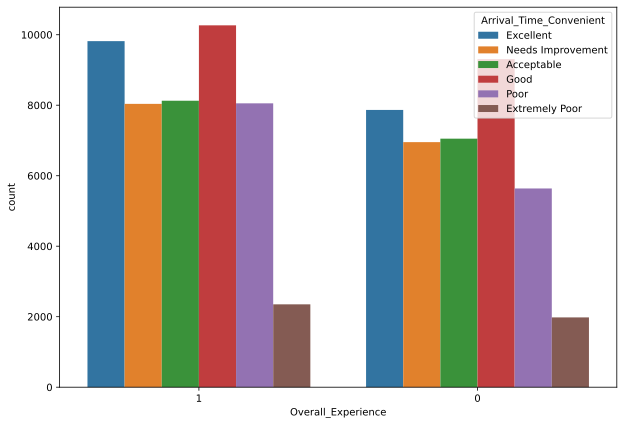

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Overall_Experience',data=dataset,order=dataset['Overall_Experience'].value_counts().index,hue='Arrival_Time_Convenient')

**We see that in both cases if the person was satisfied with the trip or not the most often the value of Arrival_Time_Convenient is good, so let's use this value to impute all the missing values.**

In [ ]:
dataset['Arrival_Time_Convenient'].fillna('Good',inplace=True)

In [ ]:
dataset.isna().sum()

Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins        57
dtype: int64

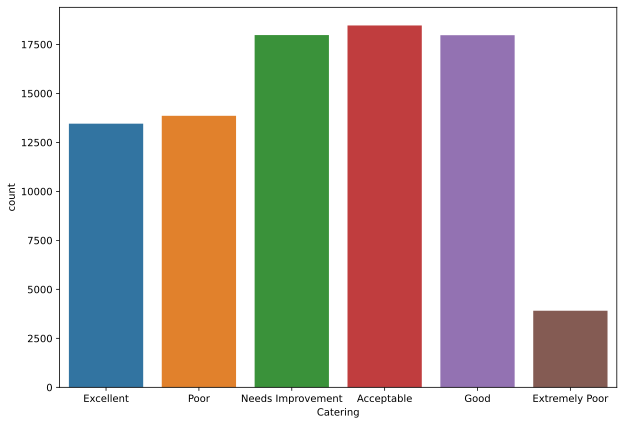

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Catering',data=dataset)

**We see that the most often value is good so we impute it.**

In [ ]:
dataset['Catering'].fillna('Good',inplace=True)
dataset.isnull().sum()

Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins        57
dtype: int64

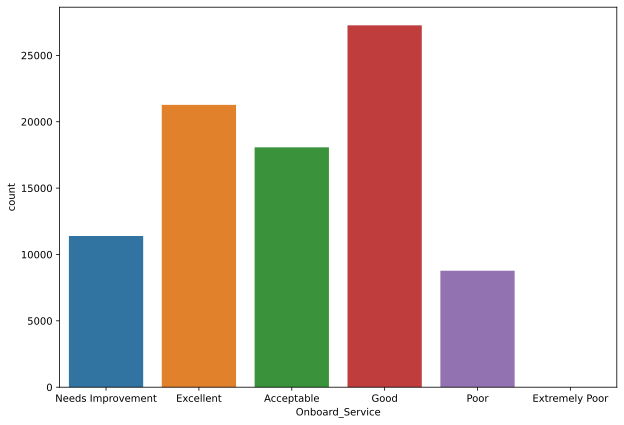

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Onboard_Service',data=dataset)

**We see that the most often value is good so we impute it.**

In [ ]:
dataset['Onboard_Service'].fillna('Good',inplace=True)

In [ ]:
dataset.isnull().sum()

Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service               0
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins        57
dtype: int64

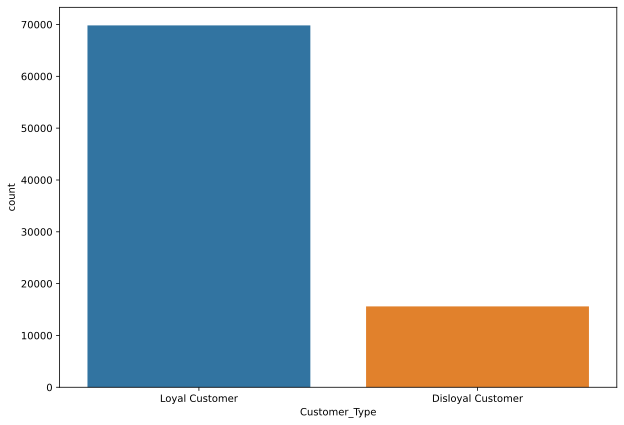

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Customer_Type',data=dataset)

**We see that the most often value is Loyal Customer so we impute it.**

In [ ]:
dataset['Customer_Type'].fillna('Loyal Customer',inplace=True)

In [ ]:
dataset.isnull().sum()

Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service               0
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type                 0
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins        57
dtype: int64

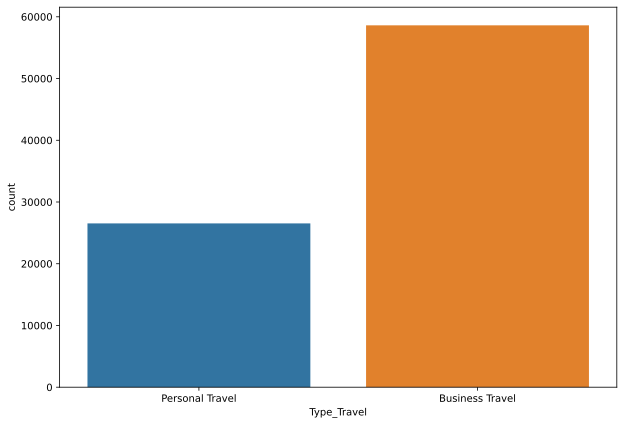

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Type_Travel',data=dataset)

**We see that the most often value is Business Travel so we impute it.**

In [ ]:
dataset['Type_Travel'].fillna('Business Travel',inplace=True)

In [ ]:
dataset.isnull().sum()

Overall_Experience           0
Seat_Comfort                61
Seat_Class                   0
Arrival_Time_Convenient      0
Catering                     0
Platform_Location           30
Onboard_Wifi_Service        30
Onboard_Entertainment       18
Online_Support              91
Ease_of_Online_Booking      73
Onboard_Service              0
Legroom                     90
Baggage_Handling           142
CheckIn_Service             77
Cleanliness                  6
Online_Boarding              6
Gender                      77
Customer_Type                0
Age                         33
Type_Travel                  0
Travel_Class                 0
Travel_Distance              0
Departure_Delay_in_Mins     57
Arrival_Delay_in_Mins       57
dtype: int64

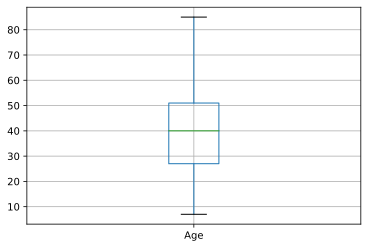

In [ ]:
dataset.boxplot('Age');

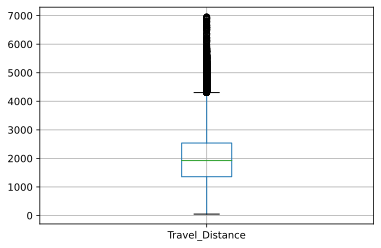

In [ ]:
dataset.boxplot('Travel_Distance');

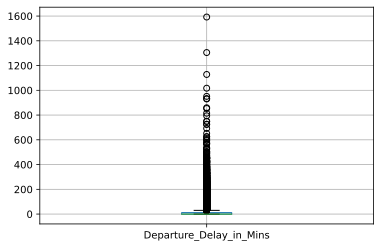

In [ ]:
dataset.boxplot('Departure_Delay_in_Mins');

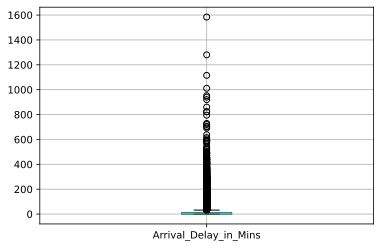

In [ ]:
dataset.boxplot('Arrival_Delay_in_Mins');

**For now we will not drop outliers, but we will keep them in mind**

**Let's convert all the categorical values to numerical and then will use KNN imputer to impute remaining NaN values**

In [ ]:
# Let's do encoding of categorical values
# But first let's  check what unique values are

for col in cat_cols:
  print(col)
  print(dataset[col].unique())
  print('\n')

Overall_Experience
[0 1]


Seat_Comfort
['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan]


Seat_Class
['Green Car' 'Ordinary']


Arrival_Time_Convenient
['Excellent' 'Needs Improvement' 'Acceptable' 'Good' 'Poor'
 'Extremely Poor']


Catering
['Excellent' 'Poor' 'Needs Improvement' 'Good' 'Acceptable'
 'Extremely Poor']


Platform_Location
['Very Convenient' 'Needs Improvement' 'Manageable' 'Inconvenient'
 'Convenient' nan 'Very Inconvenient']


Onboard_Wifi_Service
['Good' 'Needs Improvement' 'Acceptable' 'Excellent' 'Poor'
 'Extremely Poor' nan]


Onboard_Entertainment
['Needs Improvement' 'Poor' 'Good' 'Excellent' 'Acceptable'
 'Extremely Poor' nan]


Online_Support
['Acceptable' 'Good' 'Excellent' 'Poor' nan 'Needs Improvement'
 'Extremely Poor']


Ease_of_Online_Booking
['Needs Improvement' 'Good' 'Excellent' 'Acceptable' 'Poor' nan
 'Extremely Poor']


Onboard_Service
['Needs Improvement' 'Excellent' 'Acceptable' 'Good' 'Poor'
 'Extremely Poor']


**We see that many of the categorical columns are ordinal, so let's use for them ordinal encoding**

In [ ]:
dataset['Seat_Comfort'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Arrival_Time_Convenient'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Catering'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Onboard_Wifi_Service'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Onboard_Entertainment'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Online_Support'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Ease_of_Online_Booking'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Onboard_Service'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Legroom'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['CheckIn_Service'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Cleanliness'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Online_Boarding'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Platform_Location'].replace(['Very Inconvenient','Inconvenient','Needs Improvement','Manageable','Convenient','Very Convenient'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Baggage_Handling'].replace(['Poor','Needs Improvement','Acceptable','Good','Excellent'], 
                  [1,2,3,4,5],inplace=True)

In [ ]:
# Let's get dummies for non_ordinal columns
to_get_dummies_for=['Seat_Class','Gender','Customer_Type','Type_Travel','Travel_Class']

In [ ]:
# Creating dummy variables
dataset = pd.get_dummies(data = dataset, columns = to_get_dummies_for, drop_first = True)  

In [ ]:
dataset.head()

Overall_Experience  Seat_Comfort  Arrival_Time_Convenient  Catering  \
ID                                                                              
98800001                   0           3.0                        6         6   
98800002                   0           2.0                        6         2   
98800003                   1           3.0                        3         3   
98800004                   0           4.0                        3         5   
98800005                   1           4.0                        4         4   

          Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
ID                                                                         
98800001                6.0                   5.0                    3.0   
98800002                3.0                   5.0                    2.0   
98800003                3.0                   3.0                    5.0   
98800004                3.0                   4.0                    3.0   
98800005                4.0                   3.0                    5.0   

          Online_Support  Ease_of_Online_Booking  Onboard_Service  ...  \
ID                                                                 ...   
98800001             4.0                     3.0                3  ...   
98800002             5.0                     5.0                6  ...   
98800003             6.0                     6.0                6  ...   
98800004             4.0                     4.0                4  ...   
98800005             6.0                     5.0                5  ...   

          Online_Boarding   Age  Travel_Distance  Departure_Delay_in_Mins  \
ID                                                                          
98800001              2.0  52.0              272                      0.0   
98800002              5.0  48.0             2200                      9.0   
98800003              6.0  43.0             1061                     77.0   
98800004              4.0  44.0              780                     13.0   
98800005              5.0  50.0             1981                      0.0   

          Arrival_Delay_in_Mins  Seat_Class_Ordinary  Gender_Male  \
ID                                                                  
98800001                    5.0                    0            0   
98800002                    0.0                    1            1   
98800003                  119.0                    0            0   
98800004                   18.0                    1            0   
98800005                    0.0                    1            0   

          Customer_Type_Loyal Customer  Type_Travel_Personal Travel  \
ID                                                                    
98800001                             1                            0   
98800002                             1                            1   
98800003                             1                            0   
98800004                             1                            0   
98800005                             1                            0   

          Travel_Class_Eco  
ID                          
98800001                 0  
98800002                 1  
98800003                 0  
98800004                 0  
98800005                 0  

[5 rows x 24 columns]

In [ ]:
# Let's impute remaining missing values with KNN Imputer
from sklearn.impute import KNNImputer
imputer=KNNImputer()
train=imputer.fit_transform(dataset)

In [ ]:
# Let's put processed values back into dataset
dataset=pd.DataFrame(data=train,index=dataset.index,columns=dataset.columns)

In [ ]:
dataset.head()

Overall_Experience  Seat_Comfort  Arrival_Time_Convenient  Catering  \
ID                                                                              
98800001                 0.0           3.0                      6.0       6.0   
98800002                 0.0           2.0                      6.0       2.0   
98800003                 1.0           3.0                      3.0       3.0   
98800004                 0.0           4.0                      3.0       5.0   
98800005                 1.0           4.0                      4.0       4.0   

          Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
ID                                                                         
98800001                6.0                   5.0                    3.0   
98800002                3.0                   5.0                    2.0   
98800003                3.0                   3.0                    5.0   
98800004                3.0                   4.0                    3.0   
98800005                4.0                   3.0                    5.0   

          Online_Support  Ease_of_Online_Booking  Onboard_Service  ...  \
ID                                                                 ...   
98800001             4.0                     3.0              3.0  ...   
98800002             5.0                     5.0              6.0  ...   
98800003             6.0                     6.0              6.0  ...   
98800004             4.0                     4.0              4.0  ...   
98800005             6.0                     5.0              5.0  ...   

          Online_Boarding   Age  Travel_Distance  Departure_Delay_in_Mins  \
ID                                                                          
98800001              2.0  52.0            272.0                      0.0   
98800002              5.0  48.0           2200.0                      9.0   
98800003              6.0  43.0           1061.0                     77.0   
98800004              4.0  44.0            780.0                     13.0   
98800005              5.0  50.0           1981.0                      0.0   

          Arrival_Delay_in_Mins  Seat_Class_Ordinary  Gender_Male  \
ID                                                                  
98800001                    5.0                  0.0          0.0   
98800002                    0.0                  1.0          1.0   
98800003                  119.0                  0.0          0.0   
98800004                   18.0                  1.0          0.0   
98800005                    0.0                  1.0          0.0   

          Customer_Type_Loyal Customer  Type_Travel_Personal Travel  \
ID                                                                    
98800001                           1.0                          0.0   
98800002                           1.0                          1.0   
98800003                           1.0                          0.0   
98800004                           1.0                          0.0   
98800005                           1.0                          0.0   

          Travel_Class_Eco  
ID                          
98800001               0.0  
98800002               1.0  
98800003               0.0  
98800004               0.0  
98800005               0.0  

[5 rows x 24 columns]

In [ ]:
dataset.isnull().sum()

Overall_Experience              0
Seat_Comfort                    0
Arrival_Time_Convenient         0
Catering                        0
Platform_Location               0
Onboard_Wifi_Service            0
Onboard_Entertainment           0
Online_Support                  0
Ease_of_Online_Booking          0
Onboard_Service                 0
Legroom                         0
Baggage_Handling                0
CheckIn_Service                 0
Cleanliness                     0
Online_Boarding                 0
Age                             0
Travel_Distance                 0
Departure_Delay_in_Mins         0
Arrival_Delay_in_Mins           0
Seat_Class_Ordinary             0
Gender_Male                     0
Customer_Type_Loyal Customer    0
Type_Travel_Personal Travel     0
Travel_Class_Eco                0
dtype: int64

In [ ]:
# Let's drop arival delay because this field is highly correlated with departure delay
# See pairplot above
dataset.drop('Arrival_Delay_in_Mins',axis=1,inplace=True)

In [ ]:
# Let's get target and independent variables
X=dataset.drop('Overall_Experience',axis=1)
y=dataset['Overall_Experience']

In [ ]:
X.head()

Seat_Comfort  Arrival_Time_Convenient  Catering  Platform_Location  \
ID                                                                             
98800001           3.0                      6.0       6.0                6.0   
98800002           2.0                      6.0       2.0                3.0   
98800003           3.0                      3.0       3.0                3.0   
98800004           4.0                      3.0       5.0                3.0   
98800005           4.0                      4.0       4.0                4.0   

          Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
ID                                                                      
98800001                   5.0                    3.0             4.0   
98800002                   5.0                    2.0             5.0   
98800003                   3.0                    5.0             6.0   
98800004                   4.0                    3.0             4.0   
98800005                   3.0                    5.0             6.0   

          Ease_of_Online_Booking  Onboard_Service  Legroom  ...  Cleanliness  \
ID                                                          ...                
98800001                     3.0              3.0      4.0  ...          3.0   
98800002                     5.0              6.0      3.0  ...          5.0   
98800003                     6.0              6.0      6.0  ...          6.0   
98800004                     4.0              4.0      4.0  ...          4.0   
98800005                     5.0              5.0      5.0  ...          5.0   

          Online_Boarding   Age  Travel_Distance  Departure_Delay_in_Mins  \
ID                                                                          
98800001              2.0  52.0            272.0                      0.0   
98800002              5.0  48.0           2200.0                      9.0   
98800003              6.0  43.0           1061.0                     77.0   
98800004              4.0  44.0            780.0                     13.0   
98800005              5.0  50.0           1981.0                      0.0   

          Seat_Class_Ordinary  Gender_Male  Customer_Type_Loyal Customer  \
ID                                                                         
98800001                  0.0          0.0                           1.0   
98800002                  1.0          1.0                           1.0   
98800003                  0.0          0.0                           1.0   
98800004                  1.0          0.0                           1.0   
98800005                  1.0          0.0                           1.0   

          Type_Travel_Personal Travel  Travel_Class_Eco  
ID                                                       
98800001                          0.0               0.0  
98800002                          1.0               1.0  
98800003                          0.0               0.0  
98800004                          0.0               0.0  
98800005                          0.0               0.0  

[5 rows x 22 columns]

In [ ]:
y.head()

ID
98800001    0.0
98800002    0.0
98800003    1.0
98800004    0.0
98800005    1.0
Name: Overall_Experience, dtype: float64

In [ ]:
# Let's create train, validation and test datasets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.33)

In [ ]:
print('Train features',X_train.shape,'the proportion of all is: ', round(X_train.shape[0]/X.shape[0],2))
print('Val features',X_val.shape,'the proportion of all is: ', round(X_val.shape[0]/X.shape[0],2))
print('Test features',X_test.shape,'the proportion of all is: ', round(X_test.shape[0]/X.shape[0],2))

Train features (66065, 22) the proportion of all is:  0.7
Val features (18970, 22) the proportion of all is:  0.2
Test features (9344, 22) the proportion of all is:  0.1


## **Modeling**

**First of all let's try XGBoost Classifier on this problem.**

In [ ]:
# Let's import libraries for hyperparameter optimization and XGBoost
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
space={'max_depth': hp.randint("max_depth",30),
        'gamma': hp.uniform ('gamma', 0.01,1),
        'learning_rate':hp.uniform('learning_rate',0.0001,0.5),
        'reg_alpha' : hp.uniform('reg_alpha', 1e-5,180),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'subsample': hp.uniform('subsample',0.3,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 2000}

In [ ]:
# Let's define objective function
def objective(space):
    clf=xgb.XGBClassifier(**space)
    
    evaluation = [( X_val, y_val)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=50,verbose=False)
    

    pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, pred>0.5)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████| 100/100 [2:09:00<00:00, 77.41s/it, best loss: -0.9565102793885082]


In [ ]:
# This are the best parameters from 1st run
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7748658540293047, 'gamma': 0.12898087119719961, 'learning_rate': 0.051267004647345855, 'max_depth': 13, 'min_child_weight': 4.0, 'reg_alpha': 0.3626035889414432, 'reg_lambda': 0.6039267428917543, 'subsample': 0.6434374345218121}


In [ ]:
# This are the best parameters from 2nd run
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9742472686893779, 'gamma': 0.6544409280086986, 'learning_rate': 0.13863284973800571, 'max_depth': 18, 'min_child_weight': 0.0, 'reg_alpha': 5.9124027225730496, 'reg_lambda': 0.09803122734695252, 'subsample': 0.9511574359129048}


In [ ]:
xgbmodel=xgb.XGBClassifier(**best_hyperparams,n_estimators=2000)

In [ ]:
xgb_params = xgbmodel.get_xgb_params()
xgtrain = xgb.DMatrix(X_train, y_train)
cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round=xgbmodel.get_params()['n_estimators'], nfold=5,
metrics='error', early_stopping_rounds=50)
xgbmodel.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(colsample_bytree=0.9742472686893779, gamma=0.6544409280086986,
              learning_rate=0.13863284973800571, max_depth=18,
              min_child_weight=0.0, n_estimators=191,
              reg_alpha=5.9124027225730496, reg_lambda=0.09803122734695252,
              subsample=0.9511574359129048)

In [ ]:
cvresult

train-error-mean  train-error-std  test-error-mean  test-error-std
0            0.063014         0.001678         0.073110        0.002670
1            0.058953         0.001795         0.068781        0.002071
2            0.054443         0.001739         0.064406        0.001637
3            0.053251         0.001491         0.064013        0.001674
4            0.052013         0.001150         0.063105        0.001985
..                ...              ...              ...             ...
186          0.015212         0.000274         0.046530        0.000577
187          0.015167         0.000235         0.046469        0.000577
188          0.015107         0.000238         0.046500        0.000586
189          0.015095         0.000255         0.046485        0.000667
190          0.015054         0.000271         0.046364        0.000620

[191 rows x 4 columns]

In [ ]:
# Let's add  train and validation accuracies to the history
cvresult['Train Accuracy']=1-cvresult['train-error-mean']
cvresult['Validation Accuracy']=1-cvresult['test-error-mean']
cvresult.drop(['train-error-mean','train-error-std','test-error-mean','test-error-std'],axis=1,inplace=True)
cvresult

Train Accuracy  Validation Accuracy
0          0.936986             0.926890
1          0.941047             0.931219
2          0.945557             0.935594
3          0.946749             0.935987
4          0.947987             0.936895
..              ...                  ...
186        0.984788             0.953470
187        0.984833             0.953531
188        0.984893             0.953500
189        0.984905             0.953515
190        0.984946             0.953636

[191 rows x 2 columns]

In [ ]:
xgbmodel

XGBClassifier(colsample_bytree=0.9742472686893779, gamma=0.6544409280086986,
              learning_rate=0.13863284973800571, max_depth=18,
              min_child_weight=0.0, n_estimators=191,
              reg_alpha=5.9124027225730496, reg_lambda=0.09803122734695252,
              subsample=0.9511574359129048)

In [ ]:
xgbmodel.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.9742472686893779, gamma=0.6544409280086986,
              learning_rate=0.13863284973800571, max_depth=18,
              min_child_weight=0.0, n_estimators=191,
              reg_alpha=5.9124027225730496, reg_lambda=0.09803122734695252,
              subsample=0.9511574359129048)

In [ ]:
pred = xgbmodel.predict(X_val)
accuracy = accuracy_score(y_val, pred>0.5)
print('Validation accuracy: ',accuracy)

Validation accuracy:  0.9558249868212968


In [ ]:
pred = xgbmodel.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print('Test accuracy: ',accuracy)

Test accuracy:  0.9605094178082192


In [ ]:
# Let's try some other methods so we import needed libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Let's instantiate the models

lr = LogisticRegression(tol=0.0005)
dTree = DecisionTreeClassifier(max_depth=20, min_samples_split= 100, min_samples_leaf = 20)
KNN=KNeighborsClassifier(n_jobs=-1)
bagging = BaggingClassifier()
bagging_dTree = BaggingClassifier(base_estimator=dTree, n_estimators=50, max_features= 12)
bagging_KNN = BaggingClassifier(base_estimator=KNN,  max_samples=0.5, max_features=0.5)
xTree=ExtraTreesClassifier(max_depth=20,min_samples_split= 100)
rf = RandomForestClassifier(n_estimators=300, max_depth= 15, max_features= 12)
GBoost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
naive_bayes = GaussianNB()
ada_dTree=AdaBoostClassifier(base_estimator=dTree, n_estimators=50, learning_rate=0.01)
ada_rf = AdaBoostClassifier(base_estimator=rf, n_estimators=50, learning_rate=0.01)
vote=VotingClassifier(estimators=[('lr', lr), ('dTree', dTree), 
                                  ('KNN', KNN), ('bagging',bagging),
                                  ('xTree',xTree), ('rf',rf),('GBoost',GBoost),
                                  ('naive_bayes',naive_bayes), ],voting='soft',n_jobs=-1)

In [ ]:
models=[lr,dTree,KNN,bagging,bagging_dTree,bagging_KNN,xTree,rf,GBoost,
        naive_bayes,ada_dTree,vote]
model_names=['lr','dTree','KNN','bagging','bagging_dTree','bagging_KNN','xTree',
             'rf','GBoost','naive_bayes','ada_dTree','vote']

In [ ]:
for i, model in enumerate(models):
  model.fit(X_train,y_train)
  pred_train=model.predict(X_train)
  pred_val=model.predict(X_val)
  print(model_names[i],':',accuracy_score(y_train,pred_train),'|',accuracy_score(y_val,pred_val))

lr : 0.7742829032013926 | 0.7764891934633632
dTree : 0.9390146068266102 | 0.9302583025830258
KNN : 0.8119730568379626 | 0.7043753294675804
bagging : 0.9966093998334973 | 0.9450711649973642
bagging_dTree : 0.9414667373041702 | 0.9343700579862941
bagging_KNN : 0.9286460304245818 | 0.9004744333157617
xTree : 0.9392265193370166 | 0.9302583025830258
rf : 0.9801256338454553 | 0.9496046389035319
GBoost : 0.9198213880269431 | 0.9180811808118081
naive_bayes : 0.8194202679179596 | 0.8144438587243016
ada_dTree : 0.9802164534927723 | 0.9527675276752767
vote : 0.9568455309165216 | 0.9336320506062203


**We see that ada_dTree seems the most promising, let's try to optimize it.**

In [ ]:
space={'n_estimators': hp.quniform("n_estimators", 30, 200,1),
        'learning_rate': hp.uniform ('learning_rate', 0.001,1),
       'algorithm':hp.choice('algorithm',['SAMME', 'SAMME.R']),
       'max_depth':hp.quniform('max_depth',2,30,1),
       'min_samples_split':hp.uniform('min_samples_split',0,1),
       'min_samples_leaf':hp.uniform('min_samples_leaf',0,0.5)
        }

In [ ]:
# Let's define objective function
def objective(space):
    
    dTree = DecisionTreeClassifier(max_depth=int(space['max_depth']),
                                   min_samples_split= space['min_samples_split'],
                                   min_samples_leaf = space['min_samples_leaf'])
    ada_dTree=AdaBoostClassifier(base_estimator=dTree,
                    n_estimators =int(space['n_estimators']), 
                    learning_rate=space['learning_rate'],
                    algorithm=space['algorithm'])
    
    evaluation = [( X_val, y_val)]
    
    ada_dTree.fit(X_train, y_train)
    
    pred_val=ada_dTree.predict(X_val)
    return {'loss': -accuracy_score(y_val,pred_val), 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████| 100/100 [19:18<00:00, 11.59s/it, best loss: -0.9494464944649447]


In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'algorithm': 0, 'learning_rate': 0.942008818866529, 'max_depth': 22.0, 'min_samples_leaf': 0.0027534685980380846, 'min_samples_split': 0.011456181210792322, 'n_estimators': 155.0}


**Let's use Hyperopt-SKLearn optimization to find the best model and best hyper-parameters**

In [ ]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-ep8rzm2_
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-ep8rzm2_
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

In [ ]:
model = HyperoptEstimator(classifier=any_classifier('cla'), 
                          preprocessing=any_preprocessing('pre'), 
                          algo=tpe.suggest, max_evals=50)
# perform the search
model.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [03:44<00:00, 224.87s/trial, best loss: 0.042987966396730526]


In [ ]:
# summarize performance
acc = model.score(X_val, y_val)
print("Accuracy: %.3f" % acc)
# summarize the best model
print(model.best_model())

Accuracy: 0.955
{'learner': XGBClassifier(colsample_bylevel=0.9987871120034448,
              colsample_bytree=0.952051233852621, gamma=0.21022462916071297,
              learning_rate=0.007871480370887564, max_depth=10, missing=nan,
              n_estimators=3600, reg_alpha=0.033371890855037625,
              reg_lambda=2.3354834116222234, seed=4,
              subsample=0.7354839209590605, use_label_encoder=False), 'preprocs': (MinMaxScaler(feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}


**Let's try to get rid off outliers and see if it helps in generalising the model.**

In [ ]:
num_cols

['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [ ]:
del num_cols[-1]

In [ ]:
num_cols

['Age', 'Travel_Distance', 'Departure_Delay_in_Mins']

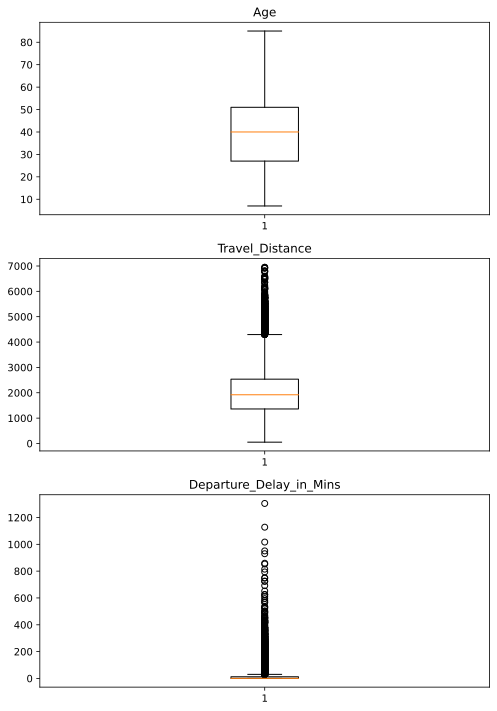

In [ ]:
fig,ax=plt.subplots(len(num_cols),figsize=(7,10))
for i, col in enumerate(X_train[num_cols]):
  ax[i].set_title(col)
  ax[i].boxplot(X_train[col])
  plt.tight_layout()

**We see that there are possible outliers in Travel_Distance and Departure_Delay_in_Mins**

In [ ]:
X_train[num_cols].describe().T

count         mean          std   min     25%  \
Age                      66065.0    39.418927    15.107338   7.0    27.0   
Travel_Distance          66065.0  1977.953576  1026.844853  50.0  1361.0   
Departure_Delay_in_Mins  66065.0    14.829447    38.780380   0.0     0.0   

                            50%     75%     max  
Age                        40.0    51.0    85.0  
Travel_Distance          1921.0  2535.0  6950.0  
Departure_Delay_in_Mins     0.0    12.0  1305.0

**It's hard to say what is metric of Travel_Distance, because the longest distance which can be traveled by Shinkansen train  is 713.7 km (okyo–Shin-Aomori, https://www.nippon.com/en/features/h00077/) and median Travel_distance in our features is 1,926. So let's try to get rid of outliers with classic interquartile approach.**

In [ ]:
# Let's find interquartile range
Q1=np.percentile(X_train['Travel_Distance'],25)
Q3=np.percentile(X_train['Travel_Distance'],75)
IQR=Q3-Q1
# Let's check how many values are outliers
print(100*len(X_train[X_train['Travel_Distance']>Q3+1.5*IQR])/len(X_train),'%')

2.0419284038446985 %


**We see that it's only ~2% of the data, so probably it's safe to get rid of it.**

In [ ]:
indices_to_drop=X_train[X_train['Travel_Distance']>Q3+1.5*IQR].index

In [ ]:
X_train.drop(indices_to_drop,inplace=True)
y_train.drop(indices_to_drop, inplace=True)

In [ ]:
# Let's check Departure_Delay_in_Mins
# Let's find interquartile range
Q1=np.percentile(X_train['Departure_Delay_in_Mins'],25)
Q3=np.percentile(X_train['Departure_Delay_in_Mins'],75)
IQR=Q3-Q1
# Let's check how many values are outliers
print(100*len(X_train[X_train['Departure_Delay_in_Mins']>Q3+1.5*IQR])/len(X_train),'%')

13.801841893812968 %


**We see that Departure Delay extreme values are ~13% of all dataset, so probably we shouldn't drop it as it may have big impact on customer experience**

**Let's check the performance of the best found model XGBoost after outliers has been dropped.**

In [ ]:
xgbmodel_1=xgb.XGBClassifier(colsample_bytree=0.9742472686893779, gamma=0.6544409280086986,
              learning_rate=0.13863284973800571, max_depth=18,
              min_child_weight=0.0, n_estimators=191,
              reg_alpha=5.9124027225730496, reg_lambda=0.09803122734695252,
              subsample=0.9511574359129048)

In [ ]:
xgbmodel_1.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.9742472686893779, gamma=0.6544409280086986,
              learning_rate=0.13863284973800571, max_depth=18,
              min_child_weight=0.0, n_estimators=191,
              reg_alpha=5.9124027225730496, reg_lambda=0.09803122734695252,
              subsample=0.9511574359129048)

In [ ]:
pred = xgbmodel_1.predict(X_val)
accuracy = accuracy_score(y_val, pred>0.5)
print('Validation accuracy: ',accuracy)

Validation accuracy:  0.9561412756984713


**We see that validation accuracy has changed only slightly.**

**Let's check another found XGBoost Model during hyperopt model search as it has around the same validation accuracy as xgbmodel_1**

In [ ]:
xgbmodel_2=xgb.XGBClassifier(colsample_bylevel=0.9987871120034448,
                             colsample_bytree=0.952051233852621, gamma=0.21022462916071297,
                             learning_rate=0.007871480370887564, max_depth=10,
                             n_estimators=3600, reg_alpha=0.033371890855037625,
                             reg_lambda=2.3354834116222234, 
                             subsample=0.7354839209590605)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
X_train_scaled=X_train.copy()
X_val_scaled=X_val.copy()
X_test_scaled=X_test.copy()

In [ ]:
train_scaled=scaler.fit_transform(X_train_scaled)
validation_scaled=scaler.fit_transform(X_val_scaled)
test_scaled=scaler.fit_transform(X_test_scaled)

In [ ]:
X_train_scaled=pd.DataFrame(train_scaled,index=X_train.index, columns=X_train.columns)
X_val_scaled=pd.DataFrame(validation_scaled, index=X_val.index, columns=X_val.columns)
X_test_scaled=pd.DataFrame(test_scaled, index=X_test.index, columns=X_test.columns)

In [ ]:
xgbmodel_2.fit(X_train_scaled,y_train)

XGBClassifier(colsample_bylevel=0.9987871120034448,
              colsample_bytree=0.952051233852621, gamma=0.21022462916071297,
              learning_rate=0.007871480370887564, max_depth=10,
              n_estimators=3600, reg_alpha=0.033371890855037625,
              reg_lambda=2.3354834116222234, subsample=0.7354839209590605)

In [ ]:
pred = xgbmodel_2.predict(X_val_scaled)
accuracy = accuracy_score(y_val, pred>0.5)
print('Validation accuracy: ',accuracy)

Validation accuracy:  0.953189246178176


**We see that validation accuracy slightly dropped.**

**Let's try to impute all missing values in the initial dataset with KNN imputer and see if it improves the model performance**

In [ ]:
dataset=survey.copy().merge(travel,how='inner',on='ID')

In [ ]:
dataset['Seat_Comfort'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Arrival_Time_Convenient'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Catering'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Onboard_Wifi_Service'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Onboard_Entertainment'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Online_Support'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Ease_of_Online_Booking'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Onboard_Service'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Legroom'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['CheckIn_Service'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Cleanliness'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Online_Boarding'].replace(['Extremely Poor','Poor','Needs Improvement', 'Acceptable', 'Good','Excellent'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Platform_Location'].replace(['Very Inconvenient','Inconvenient','Needs Improvement','Manageable','Convenient','Very Convenient'], 
                  [1,2,3,4,5,6],inplace=True)
dataset['Baggage_Handling'].replace(['Poor','Needs Improvement','Acceptable','Good','Excellent'], 
                  [1,2,3,4,5],inplace=True)

In [ ]:
# Let's get dummies for non_ordinal columns
to_get_dummies_for=['Seat_Class','Gender','Customer_Type','Type_Travel','Travel_Class']

In [ ]:
# Creating dummy variables
dataset = pd.get_dummies(data = dataset, columns = to_get_dummies_for, drop_first = True)  

In [ ]:
dataset.head()

ID  Overall_Experience  Seat_Comfort  Arrival_Time_Convenient  \
0  98800001                   0           3.0                      6.0   
1  98800002                   0           2.0                      6.0   
2  98800003                   1           3.0                      3.0   
3  98800004                   0           4.0                      3.0   
4  98800005                   1           4.0                      4.0   

   Catering  Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
0       6.0                6.0                   5.0                    3.0   
1       2.0                3.0                   5.0                    2.0   
2       3.0                3.0                   3.0                    5.0   
3       NaN                3.0                   4.0                    3.0   
4       4.0                4.0                   3.0                    5.0   

   Online_Support  Ease_of_Online_Booking  ...  Online_Boarding   Age  \
0             4.0                     3.0  ...              2.0  52.0   
1             5.0                     5.0  ...              5.0  48.0   
2             6.0                     6.0  ...              6.0  43.0   
3             4.0                     4.0  ...              4.0  44.0   
4             6.0                     5.0  ...              5.0  50.0   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

   Seat_Class_Ordinary  Gender_Male  Customer_Type_Loyal Customer  \
0                    0            0                             1   
1                    1            1                             1   
2                    0            0                             1   
3                    1            0                             1   
4                    1            0                             1   

   Type_Travel_Personal Travel  Travel_Class_Eco  
0                            0                 0  
1                            1                 1  
2                            0                 0  
3                            0                 0  
4                            0                 0  

[5 rows x 25 columns]

In [ ]:
# Let's impute remaining missing values with KNN Imputer
imputer=KNNImputer()
data=imputer.fit_transform(dataset)

In [ ]:
# Let's put processed values back into dataset
dataset=pd.DataFrame(data=data,index=dataset.index,columns=dataset.columns)

In [ ]:
dataset.head()

ID  Overall_Experience  Seat_Comfort  Arrival_Time_Convenient  \
0  98800001.0                 0.0           3.0                      6.0   
1  98800002.0                 0.0           2.0                      6.0   
2  98800003.0                 1.0           3.0                      3.0   
3  98800004.0                 0.0           4.0                      3.0   
4  98800005.0                 1.0           4.0                      4.0   

   Catering  Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
0       6.0                6.0                   5.0                    3.0   
1       2.0                3.0                   5.0                    2.0   
2       3.0                3.0                   3.0                    5.0   
3       4.8                3.0                   4.0                    3.0   
4       4.0                4.0                   3.0                    5.0   

   Online_Support  Ease_of_Online_Booking  ...  Online_Boarding   Age  \
0             4.0                     3.0  ...              2.0  52.0   
1             5.0                     5.0  ...              5.0  48.0   
2             6.0                     6.0  ...              6.0  43.0   
3             4.0                     4.0  ...              4.0  44.0   
4             6.0                     5.0  ...              5.0  50.0   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0            272.0                      0.0                    5.0   
1           2200.0                      9.0                    0.0   
2           1061.0                     77.0                  119.0   
3            780.0                     13.0                   18.0   
4           1981.0                      0.0                    0.0   

   Seat_Class_Ordinary  Gender_Male  Customer_Type_Loyal Customer  \
0                  0.0          0.0                           1.0   
1                  1.0          1.0                           1.0   
2                  0.0          0.0                           1.0   
3                  1.0          0.0                           1.0   
4                  1.0          0.0                           1.0   

   Type_Travel_Personal Travel  Travel_Class_Eco  
0                          0.0               0.0  
1                          1.0               1.0  
2                          0.0               0.0  
3                          0.0               0.0  
4                          0.0               0.0  

[5 rows x 25 columns]

In [ ]:
dataset.isnull().sum()

ID                              0
Overall_Experience              0
Seat_Comfort                    0
Arrival_Time_Convenient         0
Catering                        0
Platform_Location               0
Onboard_Wifi_Service            0
Onboard_Entertainment           0
Online_Support                  0
Ease_of_Online_Booking          0
Onboard_Service                 0
Legroom                         0
Baggage_Handling                0
CheckIn_Service                 0
Cleanliness                     0
Online_Boarding                 0
Age                             0
Travel_Distance                 0
Departure_Delay_in_Mins         0
Arrival_Delay_in_Mins           0
Seat_Class_Ordinary             0
Gender_Male                     0
Customer_Type_Loyal Customer    0
Type_Travel_Personal Travel     0
Travel_Class_Eco                0
dtype: int64

In [ ]:
# Let's drop arival delay because this field is highly correlated with departure delay
# See pairplot above
dataset.drop('Arrival_Delay_in_Mins',axis=1,inplace=True)

In [ ]:
# Let's get target and independent variables
X=dataset.drop('Overall_Experience',axis=1)
y=dataset['Overall_Experience']

In [ ]:
X.head()

ID  Seat_Comfort  Arrival_Time_Convenient  Catering  \
0  98800001.0           3.0                      6.0       6.0   
1  98800002.0           2.0                      6.0       2.0   
2  98800003.0           3.0                      3.0       3.0   
3  98800004.0           4.0                      3.0       4.8   
4  98800005.0           4.0                      4.0       4.0   

   Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
0                6.0                   5.0                    3.0   
1                3.0                   5.0                    2.0   
2                3.0                   3.0                    5.0   
3                3.0                   4.0                    3.0   
4                4.0                   3.0                    5.0   

   Online_Support  Ease_of_Online_Booking  Onboard_Service  ...  Cleanliness  \
0             4.0                     3.0              3.0  ...          3.0   
1             5.0                     5.0              6.0  ...          5.0   
2             6.0                     6.0              6.0  ...          6.0   
3             4.0                     4.0              4.0  ...          4.0   
4             6.0                     5.0              5.0  ...          5.0   

   Online_Boarding   Age  Travel_Distance  Departure_Delay_in_Mins  \
0              2.0  52.0            272.0                      0.0   
1              5.0  48.0           2200.0                      9.0   
2              6.0  43.0           1061.0                     77.0   
3              4.0  44.0            780.0                     13.0   
4              5.0  50.0           1981.0                      0.0   

   Seat_Class_Ordinary  Gender_Male  Customer_Type_Loyal Customer  \
0                  0.0          0.0                           1.0   
1                  1.0          1.0                           1.0   
2                  0.0          0.0                           1.0   
3                  1.0          0.0                           1.0   
4                  1.0          0.0                           1.0   

   Type_Travel_Personal Travel  Travel_Class_Eco  
0                          0.0               0.0  
1                          1.0               1.0  
2                          0.0               0.0  
3                          0.0               0.0  
4                          0.0               0.0  

[5 rows x 23 columns]

In [ ]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Overall_Experience, dtype: float64

In [ ]:
# Let's create train, validation and test datasets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.33)

In [ ]:
print('Train features',X_train.shape,'the proportion of all is: ', round(X_train.shape[0]/X.shape[0],2))
print('Val features',X_val.shape,'the proportion of all is: ', round(X_val.shape[0]/X.shape[0],2))
print('Test features',X_test.shape,'the proportion of all is: ', round(X_test.shape[0]/X.shape[0],2))

Train features (66065, 23) the proportion of all is:  0.7
Val features (18970, 23) the proportion of all is:  0.2
Test features (9344, 23) the proportion of all is:  0.1


In [ ]:
xgbmodel_1=xgb.XGBClassifier(colsample_bytree=0.9742472686893779, gamma=0.6544409280086986,
              learning_rate=0.13863284973800571, max_depth=18,
              min_child_weight=0.0, n_estimators=191,
              reg_alpha=5.9124027225730496, reg_lambda=0.09803122734695252,
              subsample=0.9511574359129048)

In [ ]:
xgbmodel_1.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.9742472686893779, gamma=0.6544409280086986,
              learning_rate=0.13863284973800571, max_depth=18,
              min_child_weight=0.0, n_estimators=191,
              reg_alpha=5.9124027225730496, reg_lambda=0.09803122734695252,
              subsample=0.9511574359129048)

In [ ]:
pred = xgbmodel_1.predict(X_val)
accuracy = accuracy_score(y_val, pred>0.5)
print('Validation accuracy: ',accuracy)

Validation accuracy:  0.9539272535582499


**We see that the model performance didn't improve and even slightly dropped, so let's stick to the original approach and use the xgbmodel2 as the best performing and scaled to identify the most important features.**

**But let's check its robustness on the test set first**

In [ ]:
pred = xgbmodel_2.predict(X_test_scaled)
accuracy = accuracy_score(y_test, pred>0.5)
print('Test accuracy: ',accuracy)

Test accuracy:  0.9450984589041096


**We see that the model is quite robust with validation accuracy of 95.31% and test accuracy on an unseen data of 94.51%.**

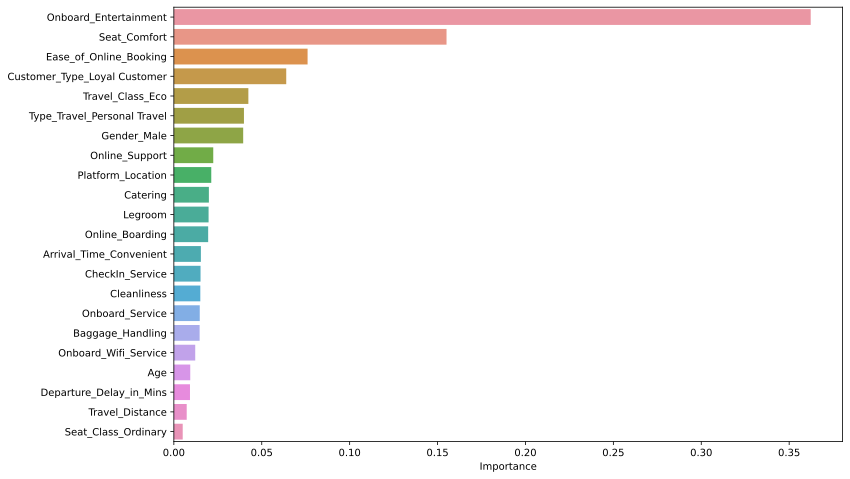

In [ ]:
importances=xgbmodel_2.feature_importances_
columns=X.columns
df_importances=pd.DataFrame(importances, index=columns,
                            columns=['Importance']).sort_values(by='Importance',
                                                                ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(df_importances.Importance,df_importances.index);

## **Final Recommendations:**

1. I recommend to pay attention for improving Onboard Entertainment, Seat Comfort and Ease of online booking as this are the most important factors for customer satisfaction. 
2. Another recommendation is to continue imporoving customer loyalty programms as it is one of the most important factors. 